In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [3]:
data = pd.read_csv('Space_Corrected.csv')

In [4]:
data

,Unnamed: 0.1,Unnamed: 0,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


In [5]:
# Preprocessing

In [6]:
data.drop([data.columns[0], data.columns[1], 'Location', 'Detail'], axis=1, inplace=True)

In [7]:
data

,Company Name,Datum,Status Rocket,Rocket,Status Mission
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",StatusActive,50.0,Success
1,CASC,"Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success
2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success
3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",StatusActive,65.0,Success
4,ULA,"Thu Jul 30, 2020 11:50 UTC",StatusActive,145.0,Success
...,...,...,...,...,...
4319,US Navy,"Wed Feb 05, 1958 07:33 UTC",StatusRetired,NaN,Failure
4320,AMBA,"Sat Feb 01, 1958 03:48 UTC",StatusRetired,NaN,Success
4321,US Navy,"Fri Dec 06, 1957 16:44 UTC",StatusRetired,NaN,Failure
4322,RVSN USSR,"Sun Nov 03, 1957 02:30 UTC",StatusRetired,NaN,Success


In [8]:
data.columns

Index(['Company Name', 'Datum', 'Status Rocket', ' Rocket', 'Status Mission'], dtype='object')

In [9]:
data.columns = ['Company Name', 'Datum', 'Status Rocket', 'Rocket', 'Status Mission']

In [10]:
data.isnull().sum()

Company Name         0
Datum                0
Status Rocket        0
Rocket            3360
Status Mission       0
dtype: int64

In [11]:
data['Rocket'].unique()

array(['50.0 ', '29.75 ', nan, '65.0 ', '145.0 ', '64.68 ', '48.5 ',
       '90.0 ', '46.0 ', '28.3 ', '29.15 ', '7.5 ', '30.8 ', '5.3 ',
       '12.0 ', '112.5 ', '120.0 ', '153.0 ', '200.0 ', '85.0 ', '115.0 ',
       '41.8 ', '21.0 ', '31.0 ', '40.0 ', '164.0 ', '62.0 ', '37.0 ',
       '350.0 ', '39.0 ', '47.0 ', '35.0 ', '69.7 ', '109.0 ', '45.0 ',
       '123.0 ', '130.0 ', '25.0 ', '56.5 ', '15.0 ', '29.0 ', '80.0 ',
       '140.0 ', '55.0 ', '59.5 ', '450.0 ', '7.0 ', '20.14 ', '133.0 ',
       '190.0 ', '135.0 ', '20.0 ', '136.6 ', '5,000.0 ', '1,160.0 ',
       '59.0 ', '63.23 '], dtype=object)

In [12]:
for value in data['Rocket']:
    print(type(value))

<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'str'>
<class 'float'>
<class 'str'>
<class 'float'>
<class

In [13]:
data['Rocket'] = data['Rocket'].astype(str).apply(lambda x: x.replace(',', '')).astype(np.float32)

In [14]:
data['Rocket'] = data['Rocket'].fillna(data['Rocket'].mean())

In [15]:
data.isnull().sum()

Company Name      0
Datum             0
Status Rocket     0
Rocket            0
Status Mission    0
dtype: int64

In [16]:
# Encoding

In [17]:
data

,Company Name,Datum,Status Rocket,Rocket,Status Mission
0,SpaceX,"Fri Aug 07, 2020 05:12 UTC",StatusActive,50.000000,Success
1,CASC,"Thu Aug 06, 2020 04:01 UTC",StatusActive,29.750000,Success
2,SpaceX,"Tue Aug 04, 2020 23:57 UTC",StatusActive,153.792206,Success
3,Roscosmos,"Thu Jul 30, 2020 21:25 UTC",StatusActive,65.000000,Success
4,ULA,"Thu Jul 30, 2020 11:50 UTC",StatusActive,145.000000,Success
...,...,...,...,...,...
4319,US Navy,"Wed Feb 05, 1958 07:33 UTC",StatusRetired,153.792206,Failure
4320,AMBA,"Sat Feb 01, 1958 03:48 UTC",StatusRetired,153.792206,Success
4321,US Navy,"Fri Dec 06, 1957 16:44 UTC",StatusRetired,153.792206,Failure
4322,RVSN USSR,"Sun Nov 03, 1957 02:30 UTC",StatusRetired,153.792206,Success


In [18]:
def get_year_from_date(date):
    year = re.search(r'[^,]*$', date).group(0)
    year = re.search(r'^\s[^\s]*', year).group(0)
    return np.int16(year)

In [19]:
def get_month_from_date(date):
    month = re.search(r'^[^0-9]*', date).group(0)
    month = re.search(r'\s.*$', month).group(0)
    return month.strip()
    

In [20]:
data['Year'] = data['Datum'].apply(get_year_from_date)
data['Month'] = data['Datum'].apply(get_month_from_date)
data.drop('Datum', axis=1, inplace=True)

In [21]:
data

,Company Name,Status Rocket,Rocket,Status Mission,Year,Month
0,SpaceX,StatusActive,50.000000,Success,2020,Aug
1,CASC,StatusActive,29.750000,Success,2020,Aug
2,SpaceX,StatusActive,153.792206,Success,2020,Aug
3,Roscosmos,StatusActive,65.000000,Success,2020,Jul
4,ULA,StatusActive,145.000000,Success,2020,Jul
...,...,...,...,...,...,...
4319,US Navy,StatusRetired,153.792206,Failure,1958,Feb
4320,AMBA,StatusRetired,153.792206,Success,1958,Feb
4321,US Navy,StatusRetired,153.792206,Failure,1957,Dec
4322,RVSN USSR,StatusRetired,153.792206,Success,1957,Nov


In [22]:
data['Status Mission'].unique()

array(['Success', 'Failure', 'Prelaunch Failure', 'Partial Failure'],
      dtype=object)

In [23]:
data['Status Mission'] = data['Status Mission'].apply(lambda x: x if x == 'Success' else 'Failure')

In [24]:
encoder = LabelEncoder()

data['Status Mission'] = encoder.fit_transform(data['Status Mission'])

In [25]:
data

,Company Name,Status Rocket,Rocket,Status Mission,Year,Month
0,SpaceX,StatusActive,50.000000,1,2020,Aug
1,CASC,StatusActive,29.750000,1,2020,Aug
2,SpaceX,StatusActive,153.792206,1,2020,Aug
3,Roscosmos,StatusActive,65.000000,1,2020,Jul
4,ULA,StatusActive,145.000000,1,2020,Jul
...,...,...,...,...,...,...
4319,US Navy,StatusRetired,153.792206,0,1958,Feb
4320,AMBA,StatusRetired,153.792206,1,1958,Feb
4321,US Navy,StatusRetired,153.792206,0,1957,Dec
4322,RVSN USSR,StatusRetired,153.792206,1,1957,Nov


In [26]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [27]:
data['Status Rocket'].unique()

array(['StatusActive', 'StatusRetired'], dtype=object)

In [28]:
status_ordering = ['StatusRetired', 'StatusActive']

In [29]:
# Given some data, a column of that data, and an ordering of the values in that column,
# perform ordinal encoding on the column and return the result.

def ordinal_encode(data, column, ordering):
    return data[column].apply(lambda x: ordering.index(x))

In [30]:
data['Month'] = ordinal_encode(data, 'Month', month_ordering)
data['Status Rocket'] = ordinal_encode(data, 'Status Rocket', status_ordering)

In [31]:
data

,Company Name,Status Rocket,Rocket,Status Mission,Year,Month
0,SpaceX,1,50.000000,1,2020,7
1,CASC,1,29.750000,1,2020,7
2,SpaceX,1,153.792206,1,2020,7
3,Roscosmos,1,65.000000,1,2020,6
4,ULA,1,145.000000,1,2020,6
...,...,...,...,...,...,...
4319,US Navy,0,153.792206,0,1958,1
4320,AMBA,0,153.792206,1,1958,1
4321,US Navy,0,153.792206,0,1957,11
4322,RVSN USSR,0,153.792206,1,1957,10


In [32]:
def onehot_encode(data, column):
    dummies = pd.get_dummies(data[column])
    data = pd.concat([data, dummies], axis=1)
    data.drop(column, axis=1, inplace=True)
    return data

In [33]:
data = onehot_encode(data, 'Company Name')

In [34]:
data

,Status Rocket,Rocket,Status Mission,Year,Month,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
0,1,50.000000,1,2020,7,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,29.750000,1,2020,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,153.792206,1,2020,7,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,65.000000,1,2020,6,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,145.000000,1,2020,6,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0,153.792206,0,1958,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4320,0,153.792206,1,1958,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4321,0,153.792206,0,1957,11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4322,0,153.792206,1,1957,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
# scaling

In [36]:
y = data['Status Mission']
X = data.drop('Status Mission', axis=1)

In [37]:
scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [38]:
X

,Status Rocket,Rocket,Year,Month,AEB,AMBA,ASI,Arianespace,Arm??e de l'Air,Blue Origin,...,SpaceX,Starsem,ULA,US Air Force,US Navy,UT,VKS RF,Virgin Orbit,Yuzhmash,i-Space
0,1.0,0.008949,1.000000,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.004895,1.000000,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.029730,1.000000,0.636364,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.011953,1.000000,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.027970,1.000000,0.545455,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0.0,0.029730,0.015873,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4320,0.0,0.029730,0.015873,0.090909,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4321,0.0,0.029730,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4322,0.0,0.029730,0.000000,0.909091,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# training

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [41]:
y.sum() / len(y)

0.8970860314523589

In [42]:
inputs = tf.keras.Input(shape=(60,))
x = tf.keras.layers.Dense(16, activation='relu')(inputs)
x = tf.keras.layers.Dense(16, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


batch_size=32
epochs=35

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs
)

Epoch 1/35
76/76 [==============================] - 7s 13ms/step - loss: 0.5457 - auc: 0.5280 - val_loss: 0.4029 - val_auc: 0.5473
Epoch 2/35
76/76 [==============================] - 1s 12ms/step - loss: 0.3235 - auc: 0.5847 - val_loss: 0.3534 - val_auc: 0.6040
Epoch 3/35
76/76 [==============================] - 1s 10ms/step - loss: 0.3039 - auc: 0.6695 - val_loss: 0.3481 - val_auc: 0.6271
Epoch 4/35
76/76 [==============================] - 1s 7ms/step - loss: 0.2990 - auc: 0.7025 - val_loss: 0.3463 - val_auc: 0.6307
Epoch 5/35
76/76 [==============================] - 1s 7ms/step - loss: 0.2952 - auc: 0.7207 - val_loss: 0.3471 - val_auc: 0.6335
Epoch 6/35
76/76 [==============================] - 1s 12ms/step - loss: 0.2920 - auc: 0.7330 - val_loss: 0.3457 - val_auc: 0.6502
Epoch 7/35
76/76 [==============================] - 0s 6ms/step - loss: 0.2891 - auc: 0.7407 - val_loss: 0.3459 - val_auc: 0.6504
Epoch 8/35
76/76 [==============================] - 0s 6ms/step - loss: 0.2865 - auc: 

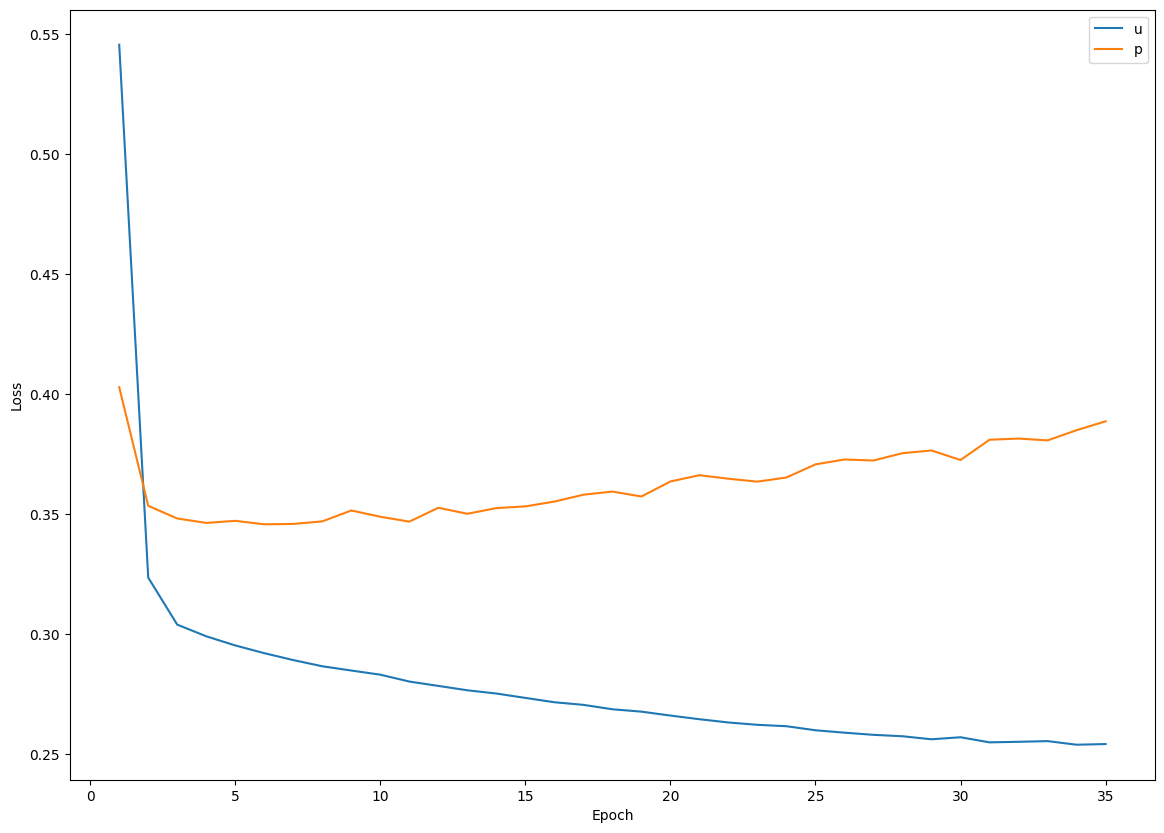

In [44]:
plt.figure(figsize=(14, 10))

epochs_range = range(1, epochs + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend('upper right')

plt.show()

In [45]:
np.argmin(val_loss)

5

In [46]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 4ms/step - loss: 0.3083 - auc: 0.7318


[0.3082643747329712, 0.7317696213722229]